# Diabetes Dataset Analysis
### Programming Foundations, Matplotlib

This notebook demonstrates basic Python programming skills using a real medical dataset.
The analysis is performed only with built-in Python tools such as lists,
dictionaries, loops, functions, and matplotlib visualizations.

## Loading and Preparing the Dataset

In this section, we load the CSV file using `csv.DictReader` and convert all string
columns into numeric data types (int or float).  

In [33]:
import csv
def load_and_convert(path):
    records = [] 
    with open("C:\\Users\\lb_20\\Desktop\\kaggle\\diabetes.csv", newline="") as f:
        reader = csv.DictReader(f) 
        for row in reader:
            row["Pregnancies"] = int(row["Pregnancies"])
            row["Glucose"] = int(row["Glucose"])
            row["BloodPressure"] = int(row["BloodPressure"])
            row["SkinThickness"] = int(row["SkinThickness"])
            row["Insulin"] = int(row["Insulin"])
            row["BMI"] = float(row["BMI"])
            row["DiabetesPedigreeFunction"] = float(row["DiabetesPedigreeFunction"])
            row["Age"] = int(row["Age"])
            row["Outcome"] = int(row["Outcome"])

            records.append(row) 

    return records  

In [35]:
data = load_and_convert("C:\\Users\\lb_20\\Desktop\\kaggle\\diabetes.csv")

In [86]:
data[:3]

[{'Pregnancies': 6,
  'Glucose': 148,
  'BloodPressure': 72,
  'SkinThickness': 35,
  'Insulin': 0,
  'BMI': 33.6,
  'DiabetesPedigreeFunction': 0.627,
  'Age': 50,
  'Outcome': 1},
 {'Pregnancies': 1,
  'Glucose': 85,
  'BloodPressure': 66,
  'SkinThickness': 29,
  'Insulin': 0,
  'BMI': 26.6,
  'DiabetesPedigreeFunction': 0.351,
  'Age': 31,
  'Outcome': 0},
 {'Pregnancies': 8,
  'Glucose': 183,
  'BloodPressure': 64,
  'SkinThickness': 0,
  'Insulin': 0,
  'BMI': 23.3,
  'DiabetesPedigreeFunction': 0.672,
  'Age': 32,
  'Outcome': 1}]

## Basic Dataset Structure

Here we check how many rows and columns the dataset contains.
This helps confirm that the file was loaded correctly and gives an overview of its size.

In [84]:
num_rows = len(data) 
num_columns = len(data[0]) 

print("Rows:", num_rows)
print("Columns:", num_columns)

Rows: 768
Columns: 9


## Age Distribution

We extract the `Age` column from all records and plot a histogram showing
the distribution of patient ages.  
This helps to understand the age structure of the dataset.

In [42]:
ages = [row["Age"] for row in data] 

In [44]:
ages[:10]

[50, 31, 32, 21, 33, 30, 26, 29, 53, 54]

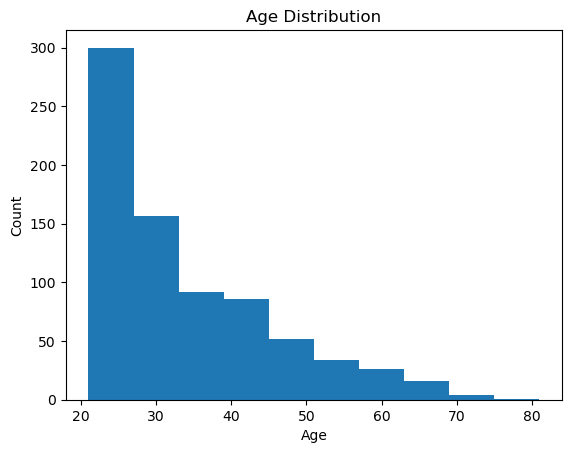

In [46]:
import matplotlib.pyplot as plt

plt.hist(ages, bins=10) 
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Basic Age Statistics

In this step, we compute the minimum, maximum, and mean age of all patients.
These simple descriptive statistics provide an overview of the dataset.

In [48]:
mean_age = sum(ages) / len(ages)
min_age = min(ages)
max_age = max(ages)
print(f"The average age in the dataset is {mean_age:.2f}", 
      f"The minimum age in the dataset is {min_age}", 
      f"The maximum age in the dataset is {max_age}", sep = "\n")

The average age in the dataset is 33.24
The minimum age in the dataset is 21
The maximum age in the dataset is 81


## Splitting the Dataset into Age Groups

To study how diabetes occurrence changes with age, we divide the dataset into
two groups:

- patients younger than 51  
- patients aged 51 and above  

We also extract the corresponding `Outcome` values (0 = non-diabetic, 1 = diabetic)
for each group.

In [50]:
all_outcomes = [row["Outcome"] for row in data] 

In [52]:
first_age_group = [i for i in ages if i < 51]
second_age_group = [i for i in ages if i >= 51]

In [54]:
print(len(first_age_group))
print(len(second_age_group))

687
81


In [60]:
outcomes_for_1st_age_group = []
outcomes_for_2nd_age_group = []

for age, outcome in zip(ages, all_outcomes): 
    if age < 51:
        outcomes_for_1st_age_group.append(outcome)
    else:
        outcomes_for_2nd_age_group.append(outcome) 

In [62]:
print(len(outcomes_for_1st_age_group))
print(len(outcomes_for_2nd_age_group))

687
81


## Function for Outcome Statistics

We define a reusable function that calculates:

- number of diabetic patients  
- number of non-diabetics  
- percentage of diabetics  
- percentage of non-diabetics  

This function will be used for both age groups.

In [64]:
def compute_outcomes_stats(outcomes):
    diabetic = [i for i in outcomes if i == 1] 
    non_diabetic = [i for i in outcomes if i == 0] 

    result = {
        "num_diabetic": len(diabetic), 
        "num_non_diabetic": len(non_diabetic), 
        "percent_diabetic": len(diabetic) / len(outcomes) * 100, 
        "percent_non_diabetic": len(non_diabetic) / len(outcomes) * 100 
    }
    return result

## Printing Summary Statistics

For clarity and readability, we format the computed results and print
the counts and percentages for each age group.

In [66]:
def print_stats(title, stats):
    print(f"{title}")
    print(f"The number of diabetics is: {stats["num_diabetic"]}")
    print(f"The number of non-diabetics is: {stats["num_non_diabetic"]}")
    print(f"The percentage of diabetics is: {stats["percent_diabetic"]:.2f}%")
    print(f"The percentage of non-diabetics is: {stats["percent_non_diabetic"]:.2f}%")
    print("-" * 40)

In [68]:
all_stats = compute_outcomes_stats(all_outcomes)
print_stats("Result for the whole dataset", all_stats)

first_stats = compute_outcomes_stats(outcomes_for_1st_age_group)
print_stats("Result for the first age group", first_stats)

second_stats = compute_outcomes_stats(outcomes_for_2nd_age_group)
print_stats("Result for the second age group", second_stats)

Result for the whole dataset
The number of diabetics is: 268
The number of non-diabetics is: 500
The percentage of diabetics is: 34.90%
The percentage of non-diabetics is: 65.10%
----------------------------------------
Result for the first age group
The number of diabetics is: 230
The number of non-diabetics is: 457
The percentage of diabetics is: 33.48%
The percentage of non-diabetics is: 66.52%
----------------------------------------
Result for the second age group
The number of diabetics is: 38
The number of non-diabetics is: 43
The percentage of diabetics is: 46.91%
The percentage of non-diabetics is: 53.09%
----------------------------------------


## Overall Diabetes vs Non-Diabetes Count

This bar chart shows how many patients in the entire dataset have diabetes
and how many do not.  
It gives a quick overview of the class distribution.

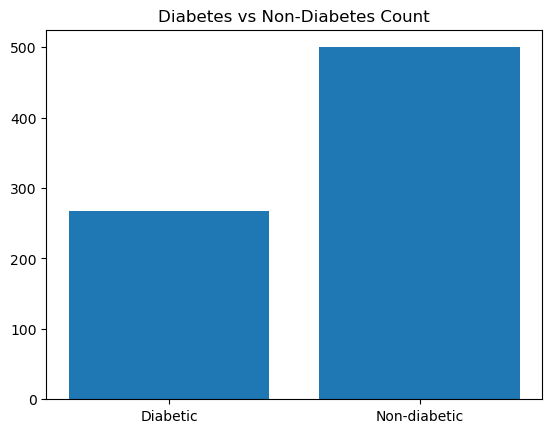

In [70]:
num_diabetic = len([i for i in all_outcomes if i == 1]) 
num_non_diabetic = len([i for i in all_outcomes if i == 0]) 

plt.bar(["Diabetic", "Non-diabetic"], [num_diabetic, num_non_diabetic]) 
plt.title("Diabetes vs Non-Diabetes Count")
plt.show()

## Age Group Sizes

This plot displays how many patients fall into each age group (under 50 and above 50).
It helps visualize whether the groups are balanced.

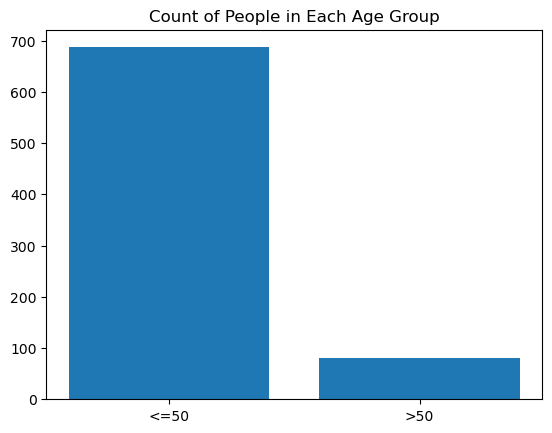

In [72]:
plt.bar(["<=50", ">50"], [
    len(outcomes_for_1st_age_group), 
    len(outcomes_for_2nd_age_group) 
])
plt.title("Count of People in Each Age Group")
plt.show()

## Diabetes Percentage in the First Age Group (Age < 51)

We calculate and plot the percentage of diabetic and non-diabetic patients
within the first age group.  
This allows us to compare the likelihood of diabetes among younger individuals.

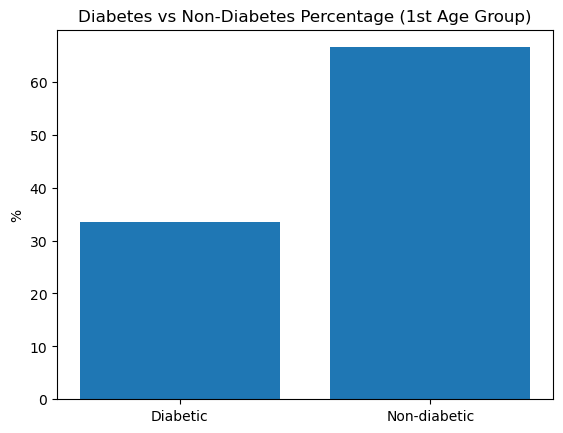

In [74]:
num_diab_1st = len([i for i in outcomes_for_1st_age_group if i == 1]) 
num_non_diab_1st = len([i for i in outcomes_for_1st_age_group if i == 0]) 
percent_diab_1st = (num_diab_1st / len(outcomes_for_1st_age_group)) * 100 
percent_non_diab_1st = (num_non_diab_1st / len(outcomes_for_1st_age_group)) * 100 

plt.bar(["Diabetic", "Non-diabetic"], [percent_diab_1st, percent_non_diab_1st]) 
plt.title("Diabetes vs Non-Diabetes Percentage (1st Age Group)")
plt.ylabel("%")
plt.show()

## Diabetes Percentage in the Second Age Group (Age > 50)

Here we compute and visualize the percentage of diabetic and non-diabetic
patients in the second age group.  
This plot helps identify how diabetes prevalence changes with age.

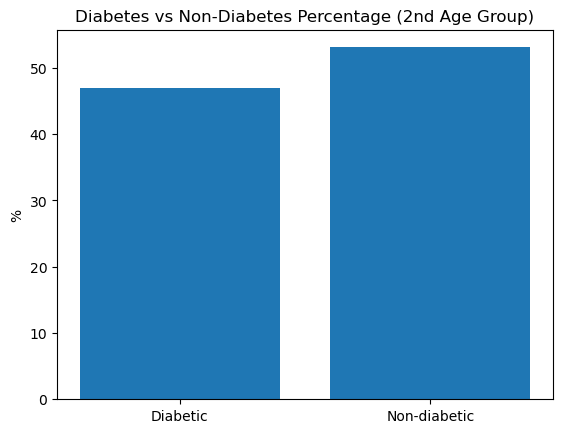

In [76]:
num_diab_2nd = len([i for i in outcomes_for_2nd_age_group if i == 1]) 
num_non_diab_2nd = len([i for i in outcomes_for_2nd_age_group if i == 0]) 
percent_diab_2nd = (num_diab_2nd / len(outcomes_for_2nd_age_group)) * 100 
percent_non_diab_2nd = (num_non_diab_2nd / len(outcomes_for_2nd_age_group)) * 100 

plt.bar(["Diabetic", "Non-diabetic"], [percent_diab_2nd, percent_non_diab_2nd]) 
plt.title("Diabetes vs Non-Diabetes Percentage (2nd Age Group)")
plt.ylabel("%")
plt.show()